<a href="https://colab.research.google.com/github/robertoalotufo/rnap/blob/master/PyTorch/LogisticRegressionMNIST-Iterativo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Softmax com dados do MNIST - Visualização do gradiente e pesos


## Objetivo

O objetivo deste notebook é ilustrar visualmente o gradiente e a atualização dos pesos a cada época de iteração nos dados de treinamento.

## Importação das bibliotecas

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
import torchvision
from keras.datasets import mnist

## Carregamento dos dados do MNIST

In [2]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
x_train, y_train = torch.FloatTensor(test_X)/255., torch.LongTensor(test_y)
x_train.dtype, x_train.shape, y_train.dtype, y_train.shape

(torch.float32, torch.Size([10000, 28, 28]), torch.int64, torch.Size([10000]))

### Carregamento, normalização e seleção dos dados do MNIST

Neste exemplo utilizaremos apenas 1000 amostras de treinamento.

In [3]:

if True:
    n_samples_train = 2000

    x_train = x_train[:n_samples_train]
    y_train = y_train[:n_samples_train]

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 2000

Dimensões dos dados das imagens:    torch.Size([2000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0.) tensor(1.)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Visualizando os dados

(-0.5, 232.5, 87.5, -0.5)

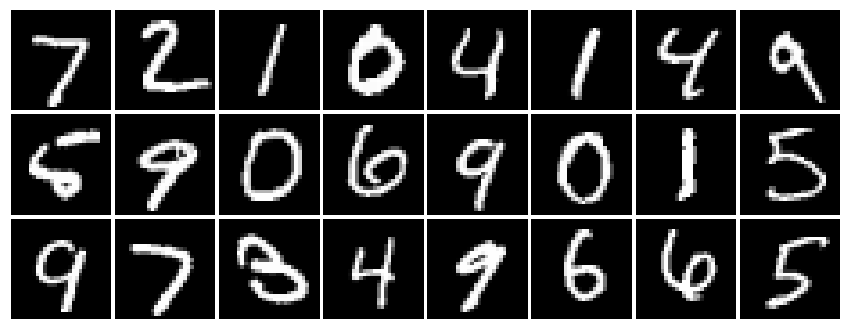

In [4]:
n_samples = 24

# cria um grid com as imagens
grid = torchvision.utils.make_grid(x_train[:n_samples].unsqueeze(1), pad_value=1.0, padding=1)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off')

## Modelo

In [7]:
class Model2(torch.nn.Module):

    def __init__(self, nlayers=1, hidden_dim=10):
        super(Model2, self).__init__()

        self.nlayers = nlayers
        self.linear1 = torch.nn.Linear(28*28, hidden_dim)
        self.linear2 = torch.nn.Linear(hidden_dim, 10)

    def forward(self, inputs):
        out = self.linear1(inputs)
        if self.nlayers == 2:
            out = torch.nn.functional.relu(out)
            out = self.linear2(out)
        return out
#model = Model2()  # uma camada apenas (28*28, 10)
model = Model2(2). # duas camadas (28*28, 10, 10)

## Treinamento

### Inicialização dos parâmetros

In [8]:
epochs = 100
learningRate = 0.8

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos pesos

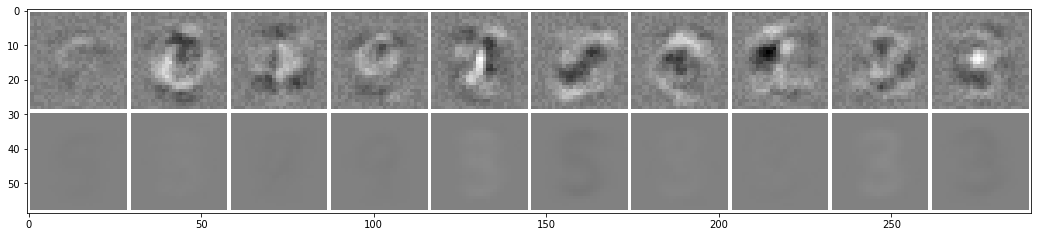

In [10]:
from IPython import display
a = 5
j = 0
losses = []
fig = plt.figure(figsize=(18, 6))

try:
    for i in range(epochs):
        # Transforma a entrada para uma dimensão
        inputs = x_train.view(-1, 28 * 28)
        # Predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, y_train)

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.data.item())
        
        wv = model.linear1.weight.data.view(10,28,28).unsqueeze(1)
        wg = model.linear1.weight.grad.data.view(10,28,28).unsqueeze(1)
        wc = torch.cat((wv,wg),0)
        wc -= wc.min()
        wc /= wc.max()
        grid = torchvision.utils.make_grid(wc, nrow=10, pad_value=1.0, padding=1)
        plt.imshow(grid.numpy().transpose(1, 2, 0))

        display.display(fig)
        display.clear_output(wait=True)
        input(j)
except KeyboardInterrupt:
    pass

<img src="https://raw.githubusercontent.com/robertoalotufo/files/master/figures/RegressaoSoftmaxArgmaxNMIST.png" width = "400">